# 1. Ekstraksi Fitur protein dari protein berbentuk file FASTA menjadi file CSV untuk melakukan klasifikasi

In [33]:
pip install discere


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for discere from https://files.pythonhosted.org/packages/ee/d4/90b5ec358a2925dee44f6fc9c3bb4069f0192907cd0d0f291637ce5d856b/discere-0.0.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [48]:
import discere.discere as di

di.extract_feature('C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/positif.fasta',
                   'C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/negatif.fasta',
                   'C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein')

Processing fasta files....
Cleaning existing data...
Generating intermediate files...
Reading data...
Clearing existing files...
C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/output/
['@relation Aminacidcomposition', '@attribute A numeric', '@attribute R numeric', '@attribute N numeric', '@attribute D numeric', '@attribute C numeric', '@attribute E numeric', '@attribute Q numeric', '@attribute G numeric', '@attribute H numeric', '@attribute I numeric', '@attribute L numeric', '@attribute K numeric', '@attribute M numeric', '@attribute F numeric', '@attribute P numeric', '@attribute S numeric', '@attribute T numeric', '@attribute W numeric', '@attribute Y numeric', '@attribute V numeric', '@attribute class {serk,loc}', '@data']
Feature extraction complete...
Extracted features are saved inC:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/ directory in .txt, .arff and .csv formats


# 2. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 2.1. Read file csv

In [2]:
kolom = [f'fitur-{i+1}' for i in range(28)]
len(kolom)

28

In [3]:
#29287 pneumonia
#38157
print('pneumonia = ',29287)
print('tbc = ',38157-29287)

pneumonia =  29287
tbc =  8870


In [4]:
df=pd.read_csv('tain_DL.csv',header=None)
df.columns = kolom
df


,fitur-1,fitur-2,fitur-3,fitur-4,fitur-5,fitur-6,fitur-7,fitur-8,fitur-9,fitur-10,...,fitur-19,fitur-20,fitur-21,fitur-22,fitur-23,fitur-24,fitur-25,fitur-26,fitur-27,fitur-28
0,30,3,23,22,9,18,8,33,20,30,...,0,7,0.050,0.345,0.264,0.366,5.685,35450.59,48.73,1
1,29,4,21,19,11,18,6,27,21,28,...,0,11,0.069,0.320,0.279,0.379,5.925,35124.94,40.29,1
2,22,4,26,27,16,27,8,20,31,25,...,3,25,0.119,0.295,0.292,0.373,5.414,41959.52,31.36,1
3,24,10,25,35,9,30,12,29,27,47,...,0,13,0.055,0.377,0.259,0.342,5.406,45144.32,42.14,1
4,23,6,19,26,14,19,9,24,24,31,...,3,12,0.080,0.321,0.249,0.360,7.114,41293.92,36.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38152,12,2,14,6,7,16,4,2,2,24,...,1,7,0.087,0.273,0.297,0.419,5.489,18981.48,36.47,0
38153,58,3,26,23,11,49,10,19,10,31,...,4,8,0.055,0.332,0.327,0.310,5.112,43345.67,35.80,0
38154,24,4,18,10,6,17,7,6,2,13,...,2,5,0.070,0.274,0.323,0.355,4.386,19556.32,10.35,0
38155,55,2,12,13,22,36,10,34,4,52,...,12,7,0.101,0.345,0.241,0.448,7.169,43728.09,33.92,0


# 3. EDA
## 3.1. Melihat persebaran untuk masing-masing fitur menggunakan SwarmPlot

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

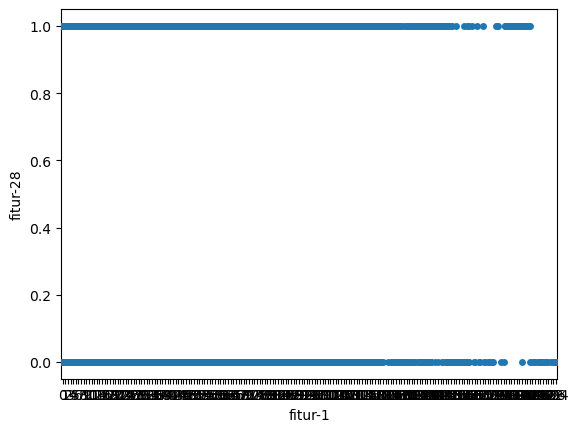

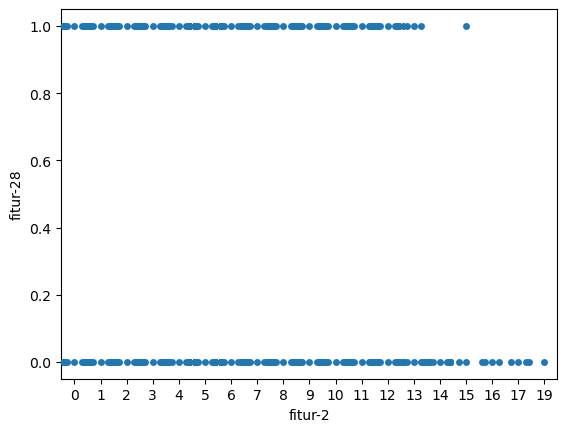

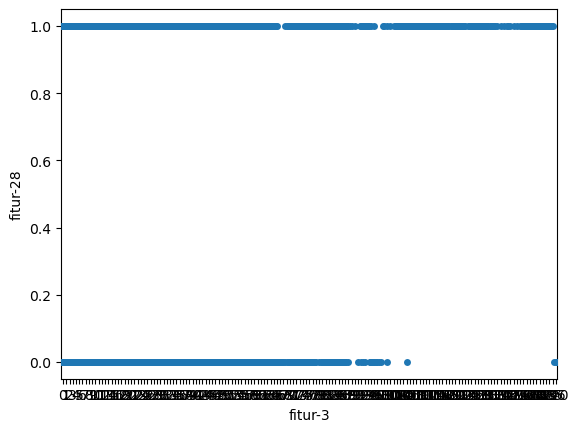

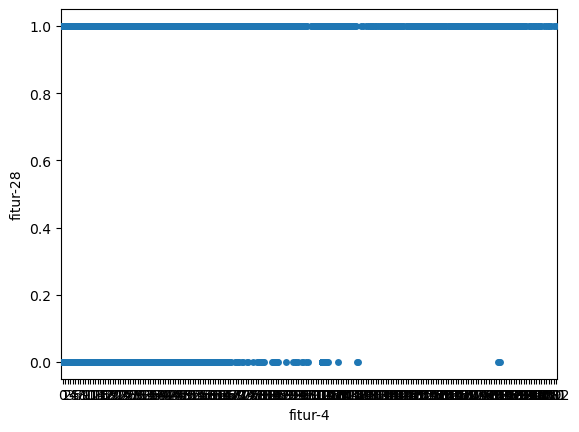

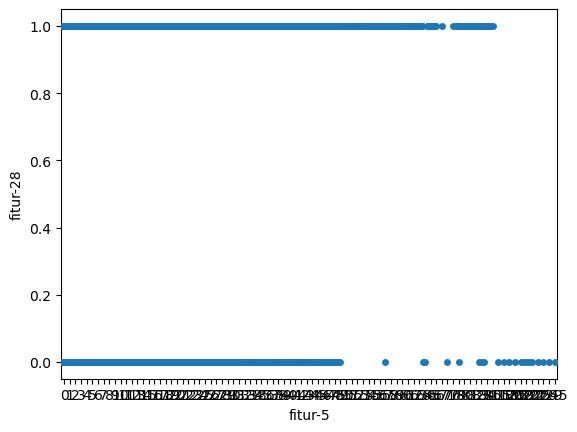

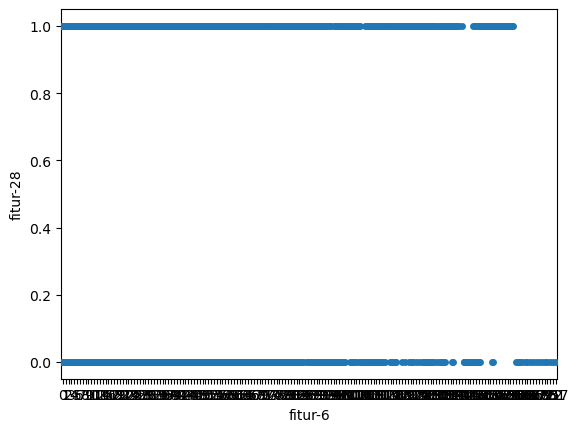

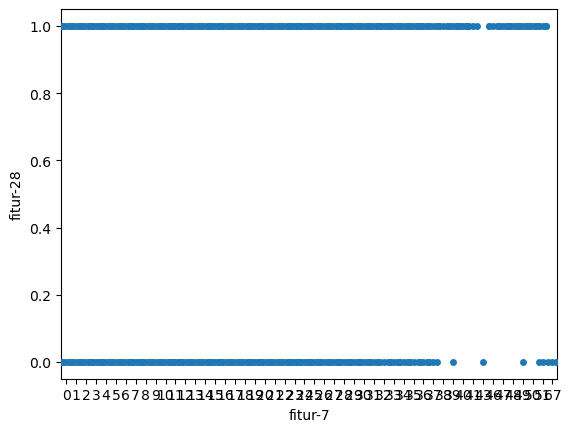

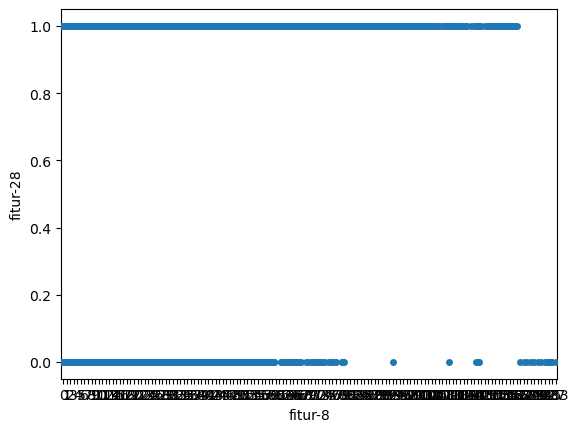

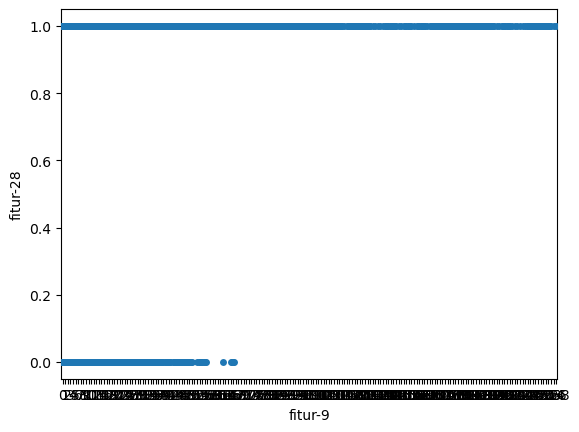

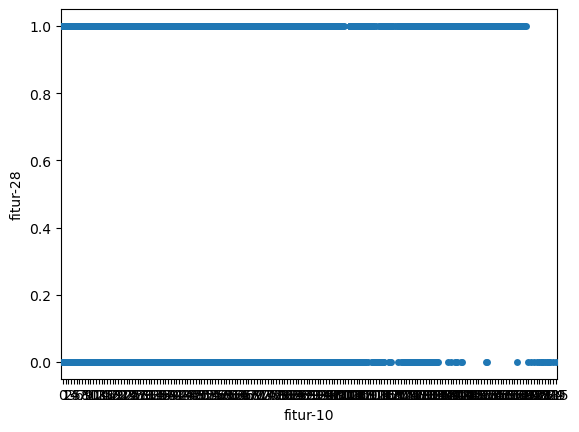

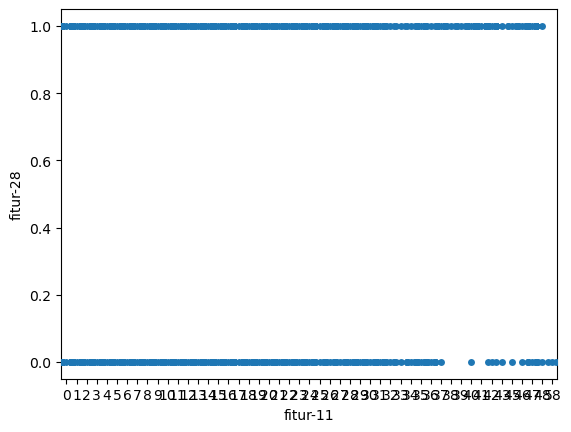

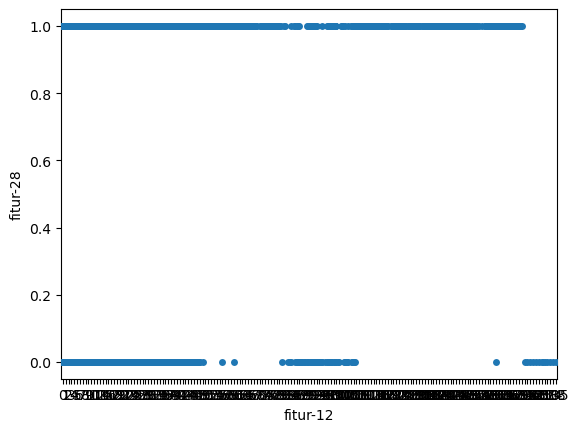

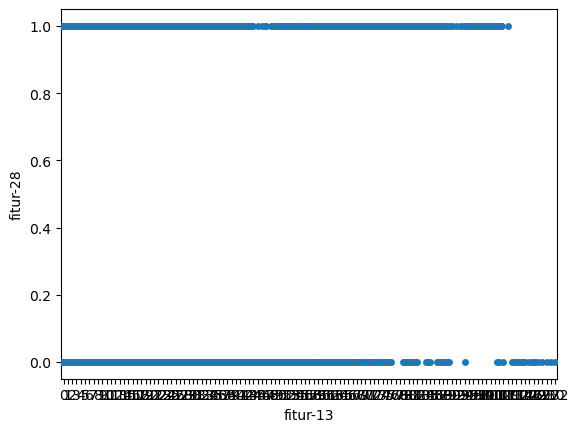

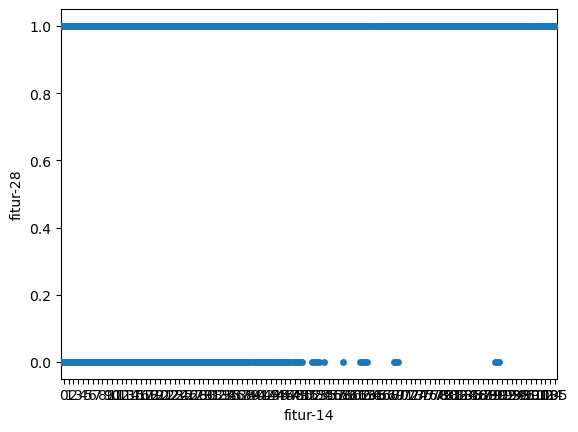

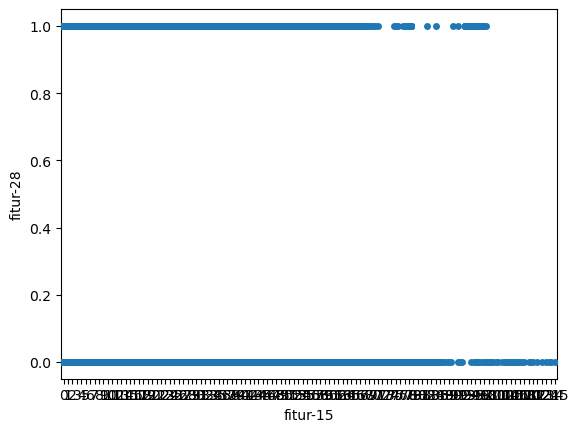

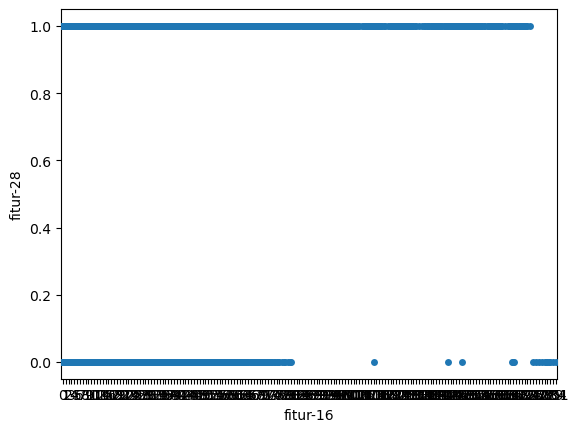

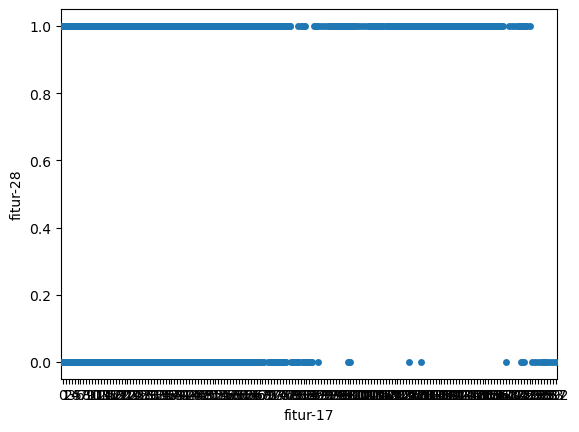

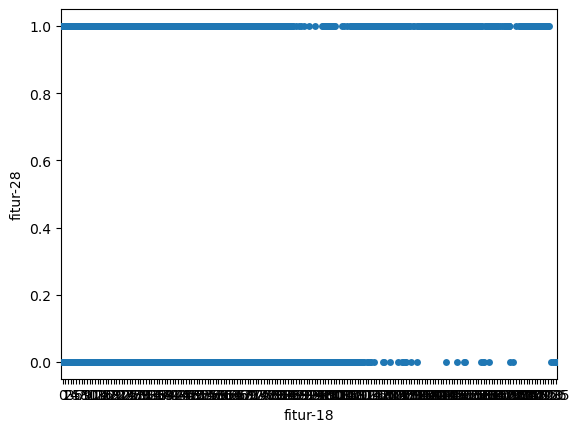

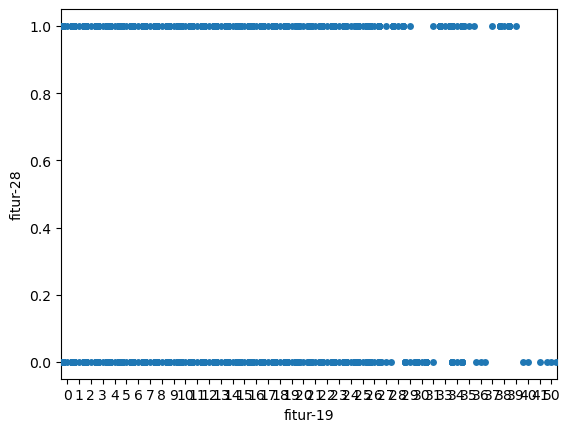

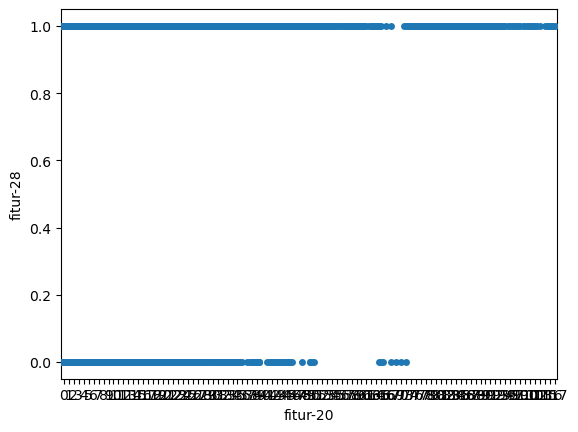

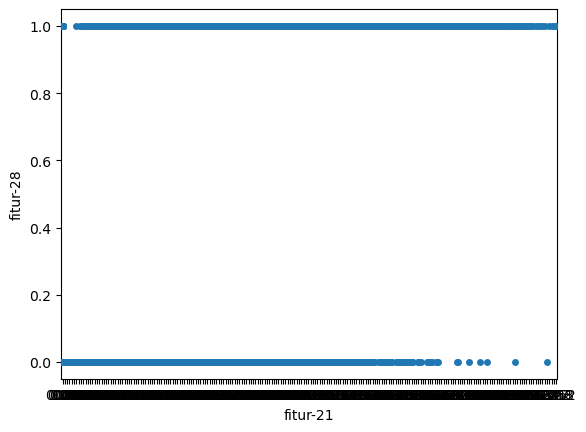

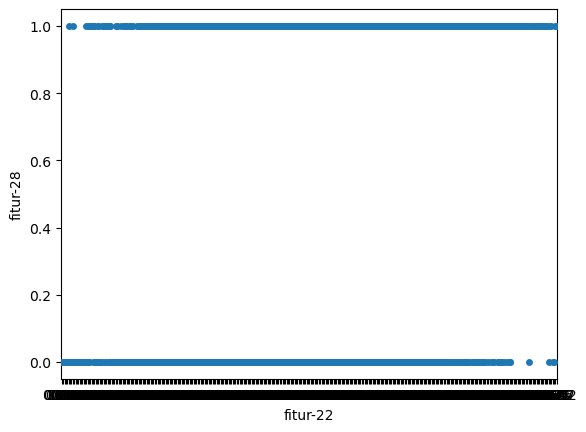

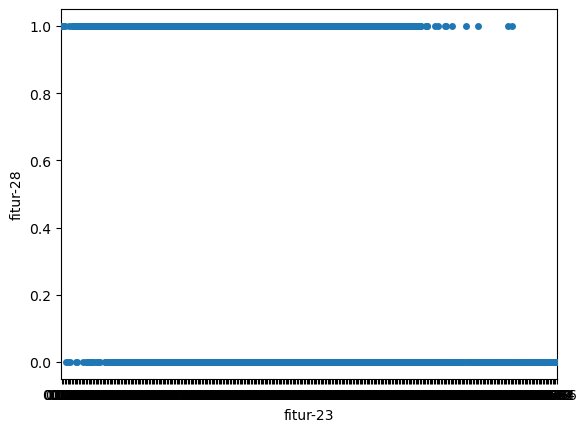

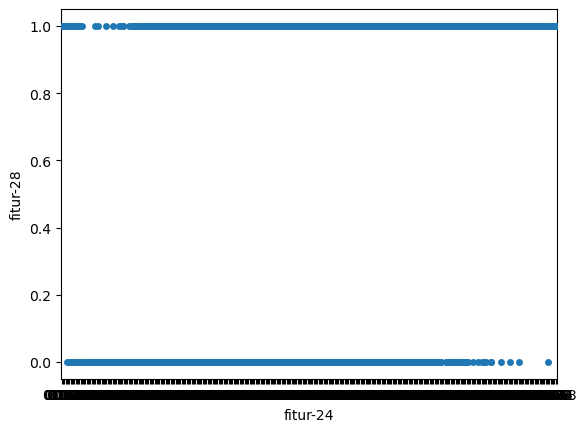

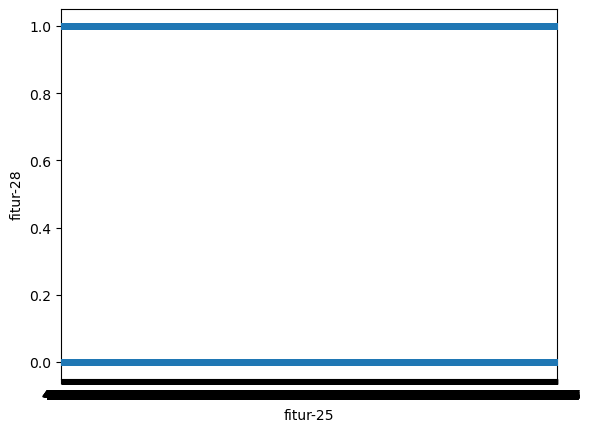

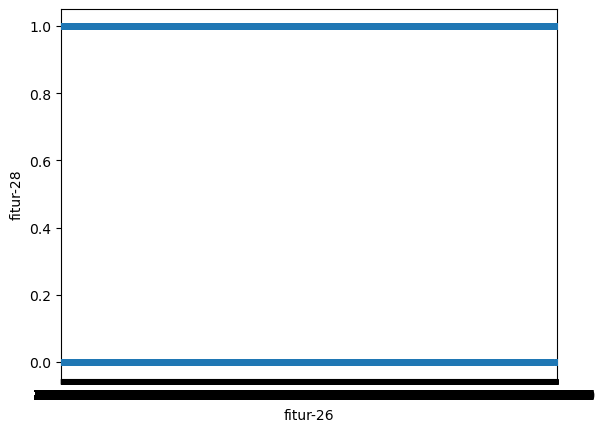

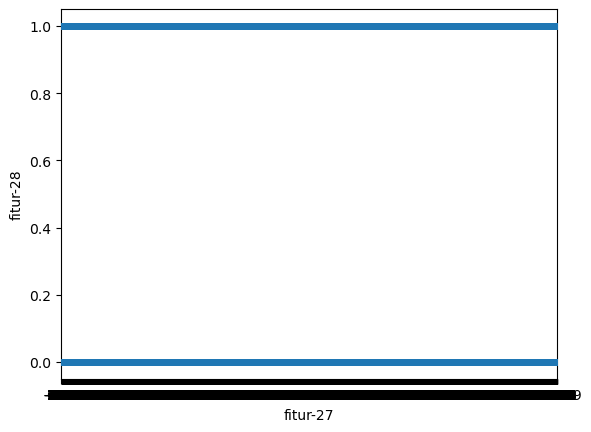

In [5]:
kolomeda =[f'fitur-{i+1}' for i in range(27)]
for i, col in enumerate(kolomeda):
    plt.figure(i)
    sns.swarmplot(data=df, x=col, y='fitur-28')

# 3.Memisahkan antara variabel bebas dan terkait

In [5]:
X=df.drop(['fitur-28'],axis=1)
y=df['fitur-28']

# 4. Eksperimen dan hasil

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
standard.set_output(transform='pandas')

StandardScaler()

## 4.1. Train:Test = 80:20 dan Membuat model SVM

### Splitting

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

### Standarisasi

In [8]:
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [9]:
x_train

,fitur-1,fitur-2,fitur-3,fitur-4,fitur-5,fitur-6,fitur-7,fitur-8,fitur-9,fitur-10,...,fitur-18,fitur-19,fitur-20,fitur-21,fitur-22,fitur-23,fitur-24,fitur-25,fitur-26,fitur-27
23917,-0.562667,0.410836,-0.087388,0.211771,-0.099474,-0.641613,-0.437088,0.730846,0.426201,0.218910,...,-0.216330,0.418471,0.765391,0.690623,-0.359692,0.261379,0.291696,0.038561,0.143738,0.286158
34305,-0.447449,-0.026461,-0.786155,-0.875097,-0.969579,-0.188115,-0.739404,-0.898844,-0.784154,-0.967843,...,-0.350208,0.418471,-0.404759,-0.498665,-3.661236,3.961479,-0.905271,0.881817,-0.482301,3.237638
25800,-1.215571,-0.901057,-0.885978,-0.952730,-1.127780,-0.888976,-1.041721,-0.898844,-0.549892,-1.159254,...,-1.108848,-0.814272,-0.794809,-0.597772,-0.456796,0.900245,0.272073,1.705623,-1.041706,-1.867959
16200,-0.447449,-0.026461,-0.037476,-0.021129,-0.415876,-0.146887,-0.285929,-0.138322,-0.120411,-0.317043,...,-0.350208,-0.814272,0.141311,-0.201343,0.077277,0.341237,-0.650180,-0.554693,-0.183219,1.018107
35208,1.319231,-0.026461,0.012435,-0.409296,-0.574077,0.471519,-0.739404,-0.246968,-0.510848,-0.355325,...,0.140677,0.213013,-0.092719,-0.928130,-1.063697,0.740529,-1.945258,0.073458,-0.709968,-0.067974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,-0.562667,-0.901057,-0.935890,-0.603380,-0.811378,-0.888976,-0.739404,-1.061813,-0.784154,-1.044407,...,-1.108848,-0.197901,-1.028839,-0.102236,1.655222,-0.191151,-0.532445,-1.051265,-0.946481,-0.771728
6265,-0.793104,-0.026461,-0.237124,-0.525746,-0.732278,-0.600386,-0.285929,0.133293,-0.237542,-0.738149,...,-0.573337,-0.608815,-0.560779,-0.696880,-0.772385,-0.244390,0.664521,-0.467736,-0.550425,-1.139394
11284,-0.946728,-0.901057,-0.436771,-0.486930,-0.336775,-0.559159,-0.588246,-0.844521,-0.276586,-0.661584,...,-0.662589,0.007556,-0.326749,1.252231,-0.286863,0.900245,-0.100752,-0.212585,-0.607411,-1.352550
860,-0.524261,-0.901057,-0.736243,-0.836280,1.403435,0.306611,0.016387,0.024647,-0.432761,0.333757,...,0.006799,0.213013,-0.248739,2.243304,-0.578176,-0.643681,2.548272,1.381250,-0.257242,-1.723599


In [10]:
x_test

,fitur-1,fitur-2,fitur-3,fitur-4,fitur-5,fitur-6,fitur-7,fitur-8,fitur-9,fitur-10,...,fitur-18,fitur-19,fitur-20,fitur-21,fitur-22,fitur-23,fitur-24,fitur-25,fitur-26,fitur-27
10098,3.431566,-0.901057,7.698864,4.947408,5.121158,5.130184,3.946506,7.032312,8.781552,3.434626,...,4.023127,2.678499,5.445990,-0.003128,-0.214035,1.725447,-0.964138,-0.141646,5.890848,-0.777367
6267,-0.869916,-0.026461,-0.386860,-0.681013,-0.653177,-0.559159,-0.134771,-0.572906,-0.276586,-0.049067,...,-0.751841,-0.814272,-0.560779,-0.762951,0.247210,0.021804,0.213206,0.467626,-0.525608,-0.425490
30756,1.088794,0.410836,-0.187212,-0.059946,-0.020373,0.677655,0.167546,0.078970,-0.120411,0.104063,...,0.586935,0.007556,-0.326749,-0.696880,0.562799,-0.830017,-0.296976,1.349213,0.175348,-0.318348
18555,0.474297,-0.463759,-0.287036,0.172954,-0.020373,-0.229342,-0.437088,0.187616,0.035764,-0.010784,...,-0.394834,-0.608815,0.453351,0.327229,1.509565,-1.415645,0.173961,-0.617051,-0.039877,-0.231507
15743,0.051830,-0.463759,-0.287036,-0.137579,-0.020373,-0.311796,0.016387,-0.083999,-0.198499,-0.393608,...,-0.260956,-0.814272,-0.872819,-0.829023,0.781283,-0.191151,-0.807159,-0.241190,-0.297459,0.085408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13789,-0.754698,-0.463759,-0.786155,-0.176396,-0.336775,-0.847749,-1.041721,-0.518583,-0.081367,-0.049067,...,-0.885718,-0.403358,-0.170729,0.723659,2.043639,-1.921414,0.272073,1.527132,-0.482274,0.180144
31805,-1.100353,-0.463759,-0.786155,-0.564563,-1.206881,-0.930203,-0.890563,-1.116136,-0.784154,-0.967843,...,-1.153473,-0.403358,-1.028839,-1.621881,0.635627,-0.457345,-1.964881,-0.437415,-1.112725,-3.170580
36253,-0.293825,2.160027,0.361819,-0.254029,0.058727,-0.517932,-0.285929,-0.898844,-0.667023,0.218910,...,-0.305582,-0.197901,-1.028839,-0.663844,0.417142,0.367857,-0.434333,-0.897373,-0.246870,1.485021
6282,-0.985134,-0.901057,-0.885978,-0.797463,-1.206881,-0.765294,-1.041721,-1.116136,-0.588936,-1.120972,...,-0.707215,-0.814272,-1.028839,-2.117418,1.193976,-0.643681,0.075849,-0.478034,-1.042430,-1.341272


In [11]:
print(f'Label 1 pada data training sebanyak {y_train.value_counts()[1]} dengan rasio {(y_train.value_counts()[1]/(y_train.value_counts()[1]+y_train.value_counts()[0]))*100:.4f}%')
print(f'Label 0 pada data training sebanyak {y_train.value_counts()[0]} dengan rasio {(y_train.value_counts()[0]/(y_train.value_counts()[1]+y_train.value_counts()[0]))*100:.4f}%')
print(f'Label 1 pada data testing sebanyak {y_test.value_counts()[1]} dengan rasio {(y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0]))*100:.4f}%')
print(f'Label 0 pada data testing sebanyak {y_test.value_counts()[0]} dengan rasio {(y_test.value_counts()[0]/(y_test.value_counts()[1]+y_test.value_counts()[0]))*100:.4f}%')

Label 1 pada data training sebanyak 26308 dengan rasio 76.6081%
Label 0 pada data training sebanyak 8033 dengan rasio 23.3919%
Label 1 pada data testing sebanyak 2979 dengan rasio 78.0660%
Label 0 pada data testing sebanyak 837 dengan rasio 21.9340%


### Melakukan hyperparameter untuk model SVM menggunakan GridSearch

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [13]:
svm_classifier = SVC()

In [11]:
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [i for i in range(1,100)] #1001
}

In [14]:
grid_search=GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [15]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [16]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'C': 71, 'kernel': 'rbf'}
Best Accuracy: 98.97%


### Membuat model SVM menggunakan parameter terbaik berdasarkan hasil GridSearch dengan Cross Validation k=5 dan fokus terhadap akurasi

In [14]:
svm_classifierfinal=SVC(C=71,kernel='rbf')

In [15]:
svm_classifierfinal.fit(x_train,y_train)

SVC(C=71)

In [16]:
import joblib

joblib.dump(svm_classifierfinal, f'SVM.pkl')

['SVM.pkl']

### Evaluasi Metrik untuk model SVM

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score as rocauc
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rc
def spec(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity


Classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       837
           1       0.99      1.00      1.00      2979

    accuracy                           0.99      3816
   macro avg       0.99      0.99      0.99      3816
weighted avg       0.99      0.99      0.99      3816

Nilai Akurasi untuk SVM  0.9924004192872118
Nilai Sensitivitas untuk SVM  0.9966431688486069
Nilai Spesifisitas untuk SVM  0.977299880525687
Nilai ROC-AUC untuk SVM  0.9869715246871469


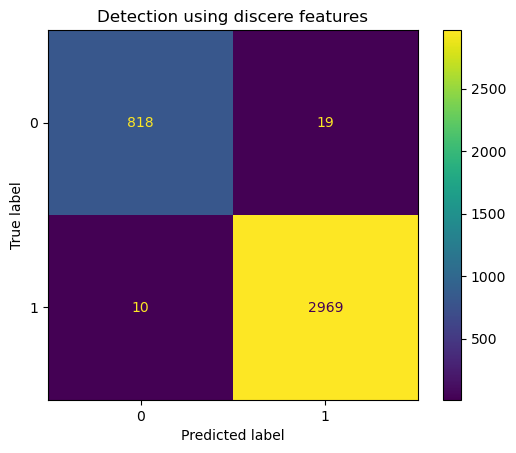

In [18]:
y_pred_svm=svm_classifierfinal.predict(x_test)
cm=confusion_matrix(y_test,y_pred_svm)
cm_display=ConfusionMatrixDisplay(cm)
print(f"\nClassification report")
print(classification_report(y_test, y_pred_svm))
cm_display.plot()
cm_display.ax_.set_title(f'Detection using discere features')
print("Nilai Akurasi untuk SVM ",acc(y_test,y_pred_svm))
print("Nilai Sensitivitas untuk SVM ",rc(y_test,y_pred_svm))
print("Nilai Spesifisitas untuk SVM ",spec(y_test,y_pred_svm))
print("Nilai ROC-AUC untuk SVM ",rocauc(y_test,y_pred_svm))

### Membuat model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54

In [19]:
from sklearn.ensemble import BaggingClassifier

In [20]:
clf=[]
for i in range(54):
    clf.append(BaggingClassifier(estimator=svm_classifierfinal,n_estimators=i+1,random_state=42).fit(x_train, y_train))

### Evaluasi metrik model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54

In [21]:
y_pred=[]
for i in range(54):
    y_pred.append(clf[i].predict(x_test))


Classification report 1-estimator
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       837
           1       0.99      0.99      0.99      2979

    accuracy                           0.99      3816
   macro avg       0.99      0.98      0.98      3816
weighted avg       0.99      0.99      0.99      3816


Classification report 2-estimator
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       837
           1       0.99      0.99      0.99      2979

    accuracy                           0.99      3816
   macro avg       0.98      0.98      0.98      3816
weighted avg       0.99      0.99      0.99      3816


Classification report 3-estimator
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       837
           1       0.99      1.00      0.99      2979

    accuracy                           0.99      3816
   macro avg       0.99

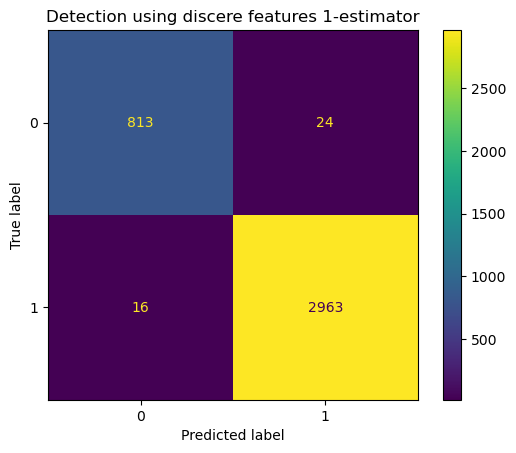

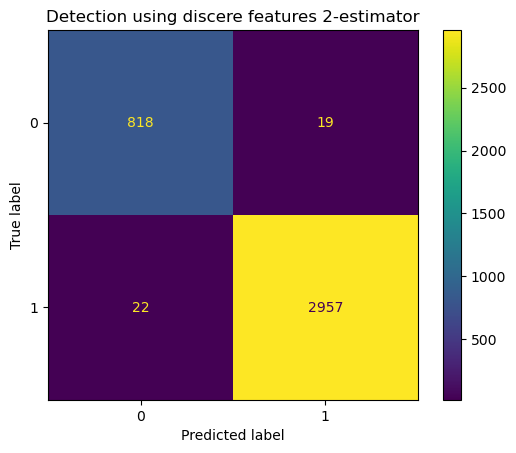

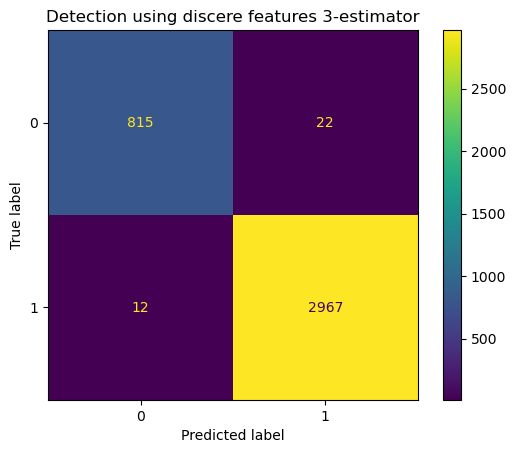

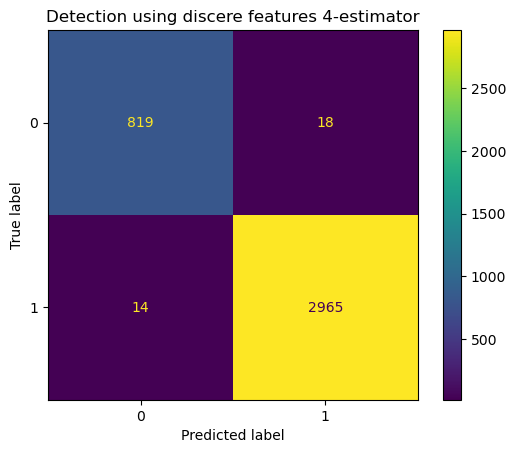

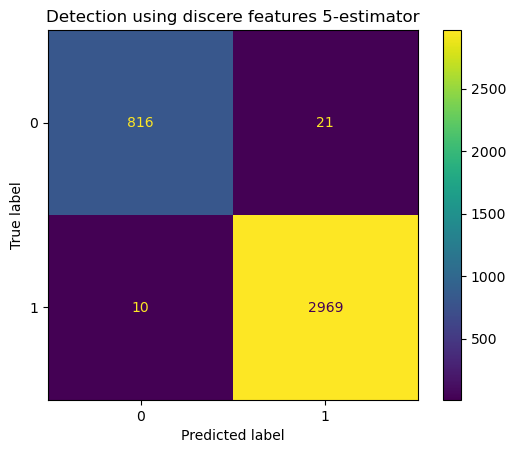

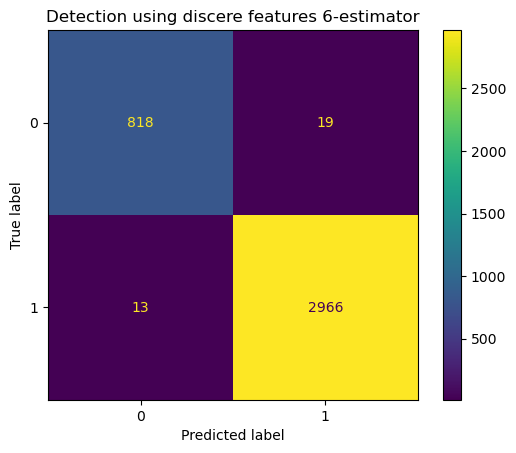

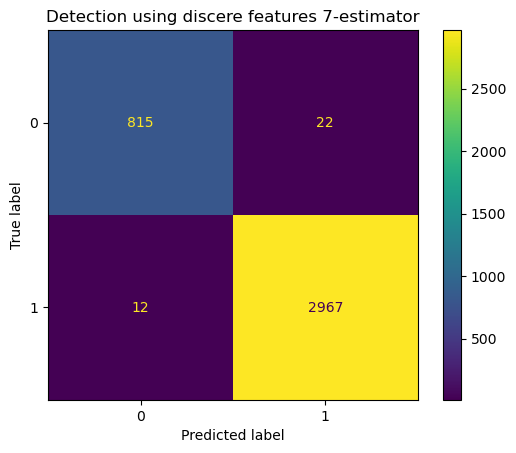

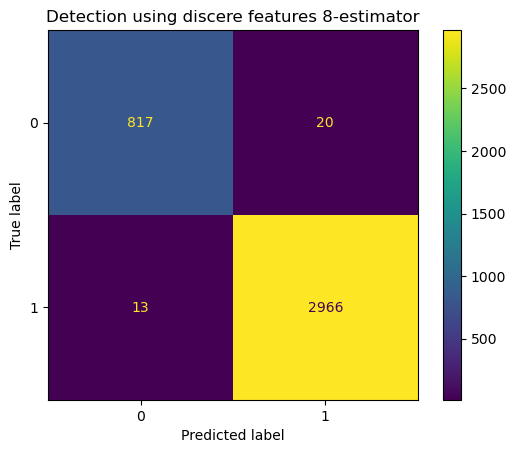

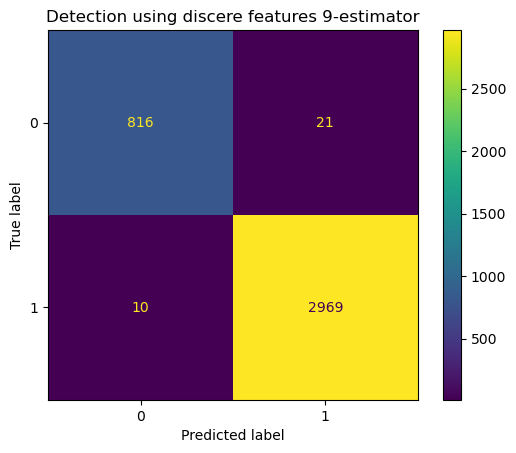

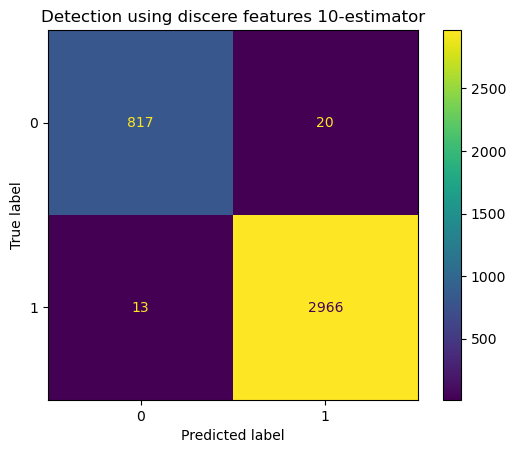

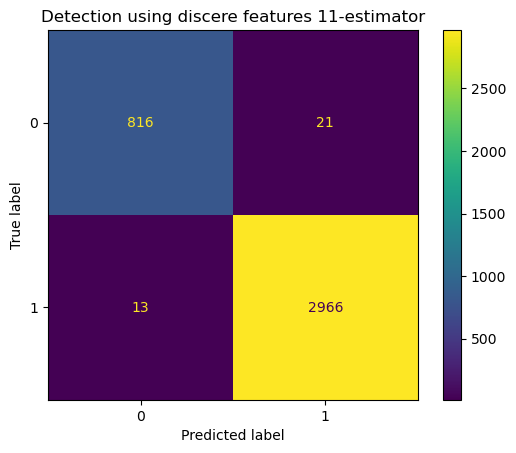

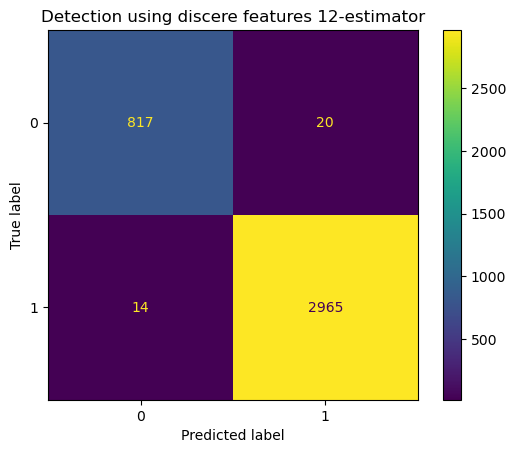

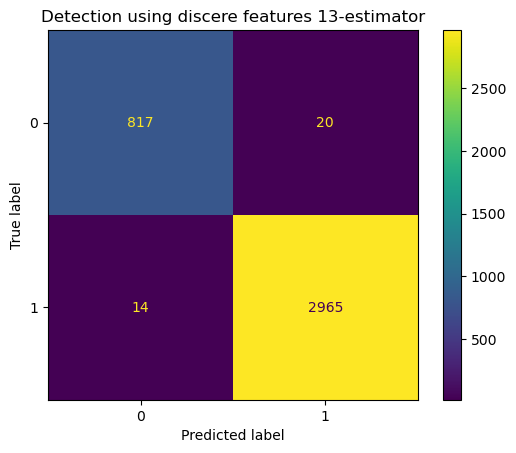

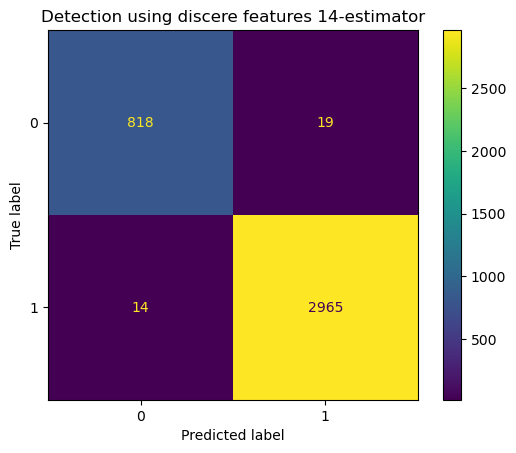

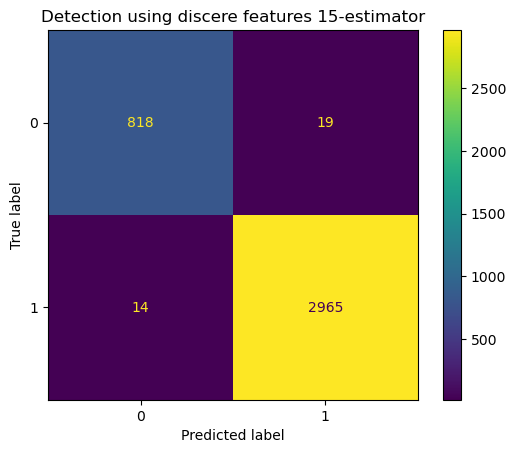

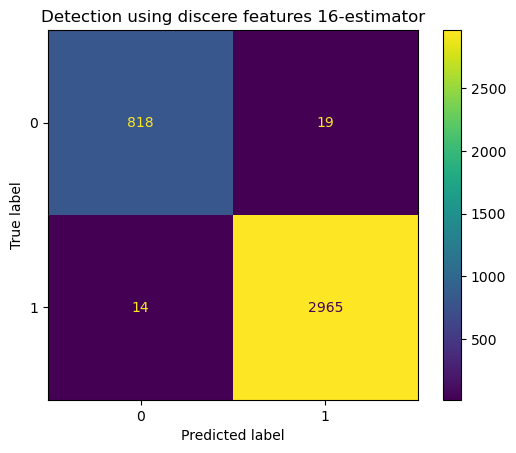

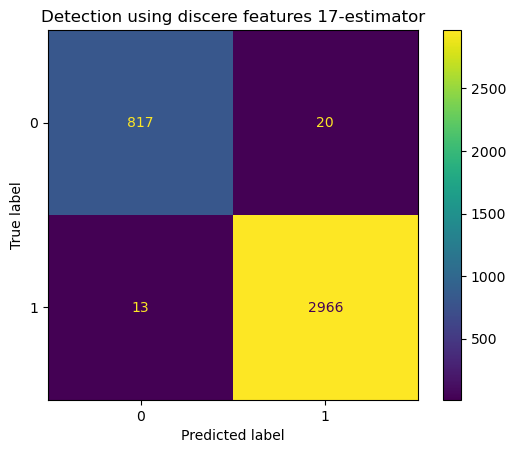

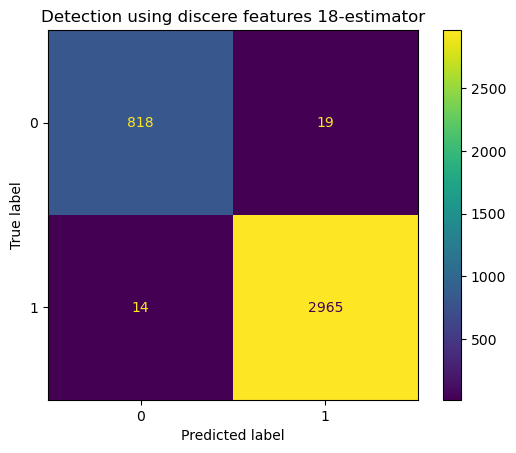

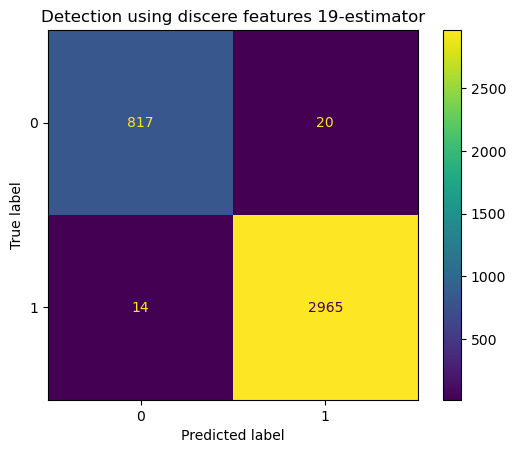

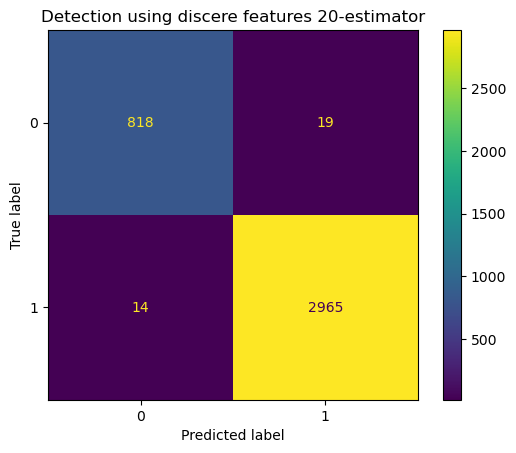

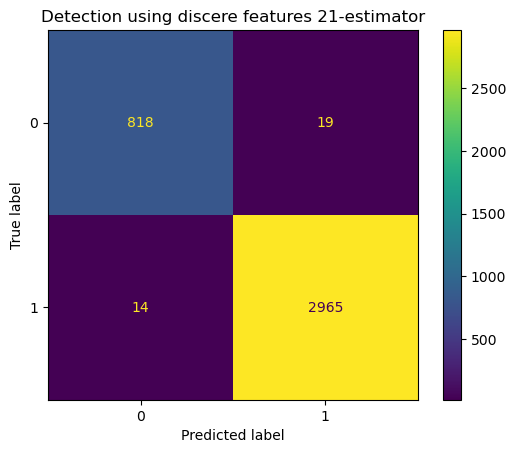

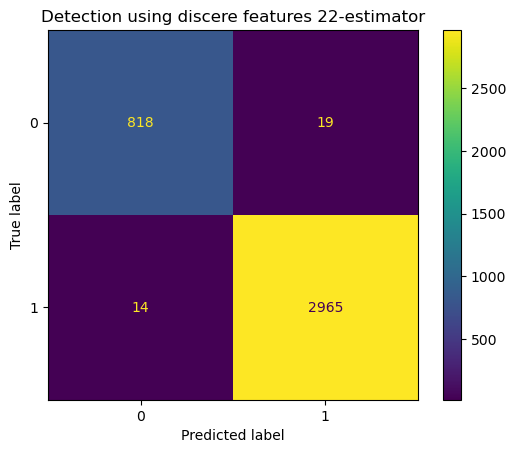

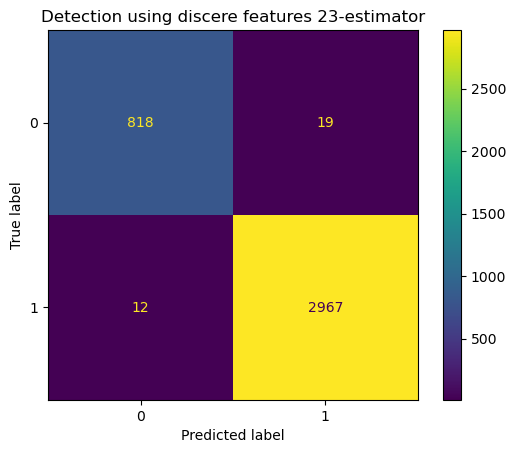

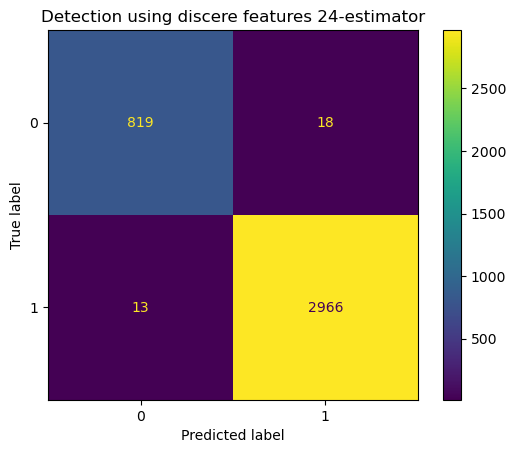

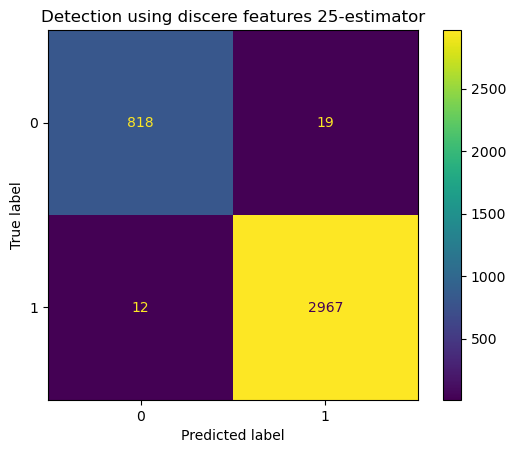

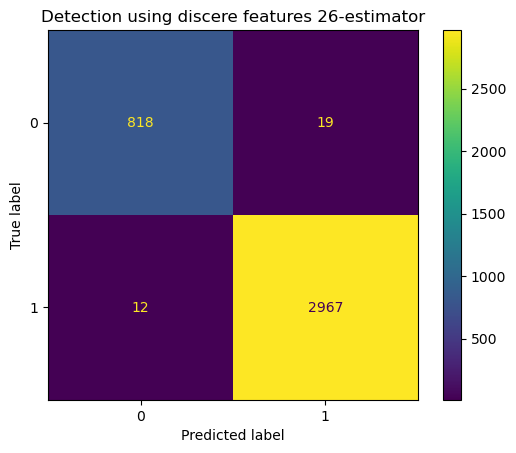

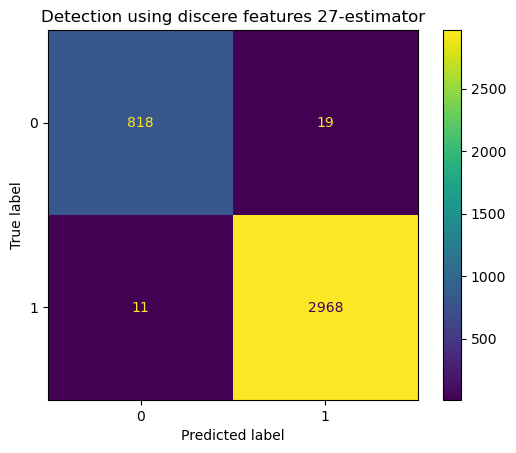

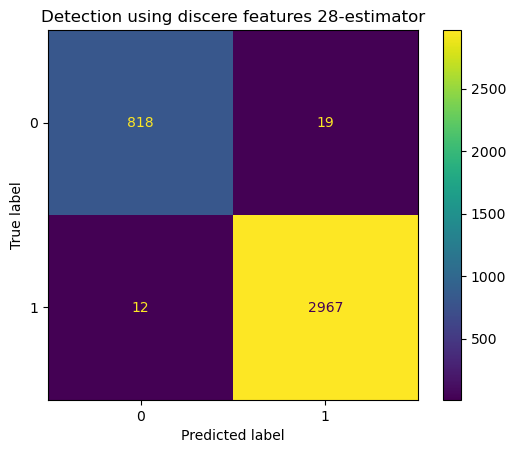

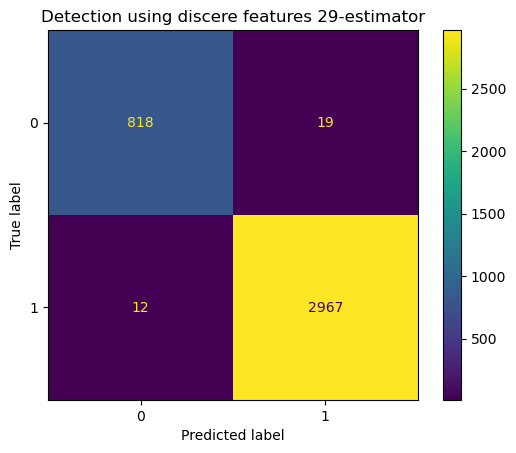

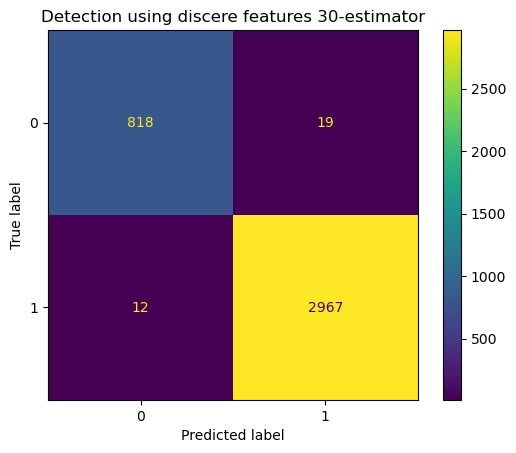

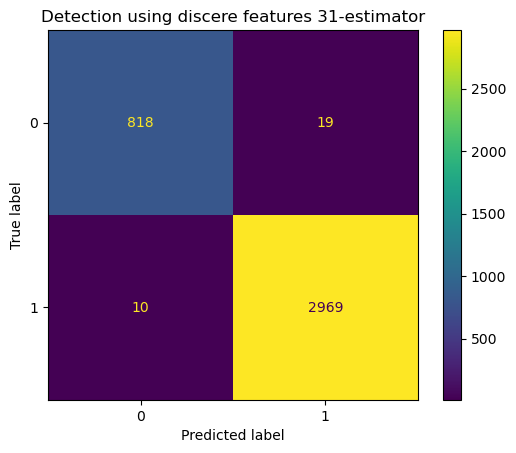

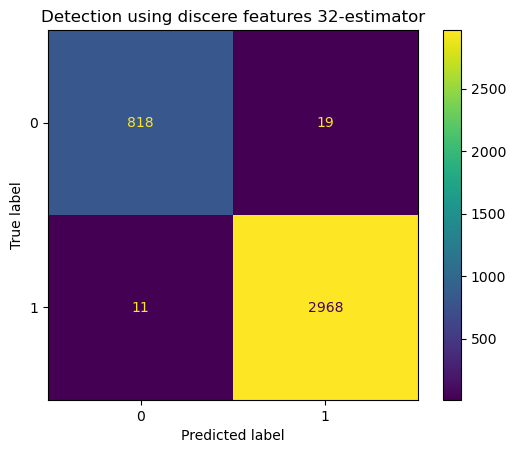

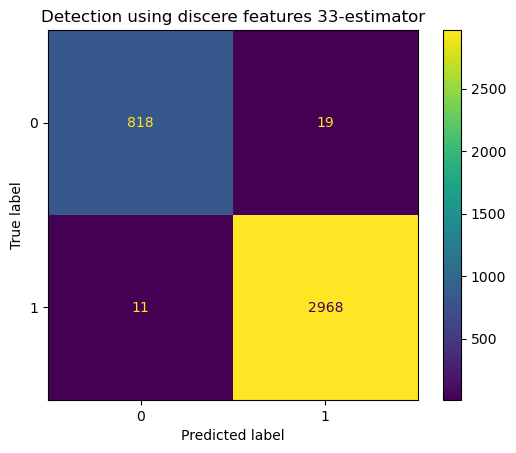

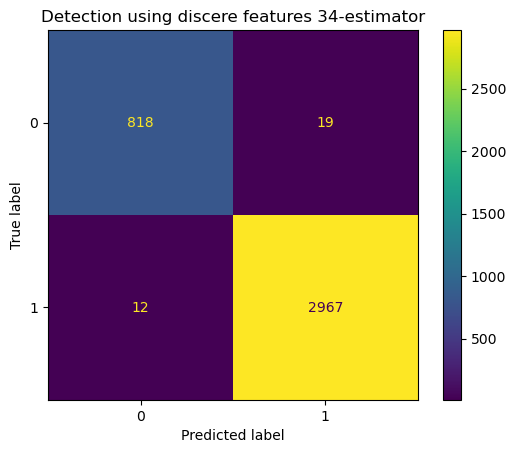

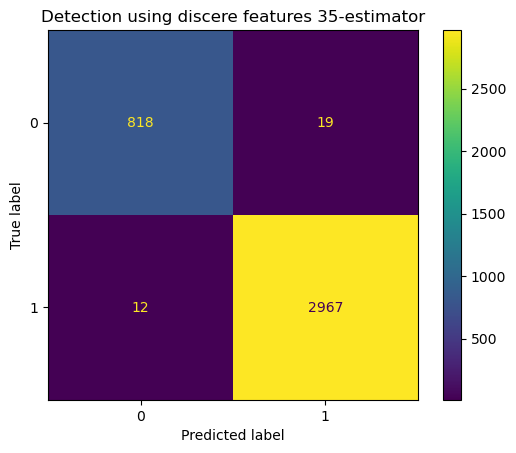

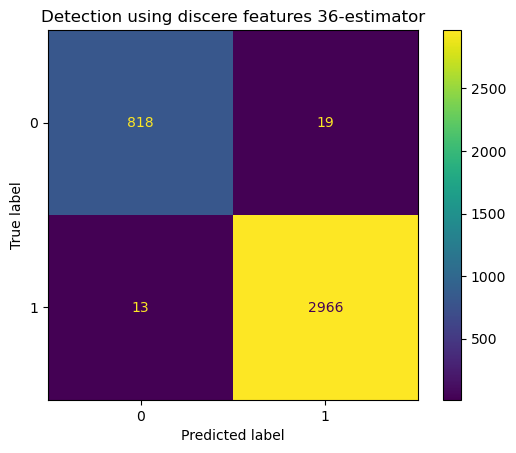

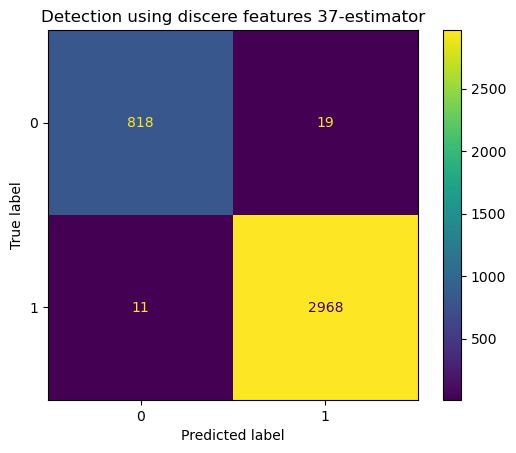

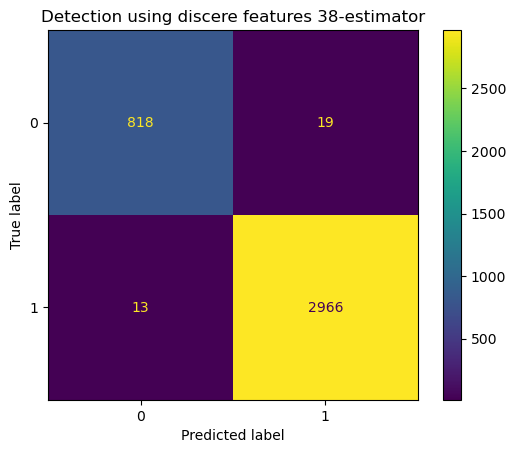

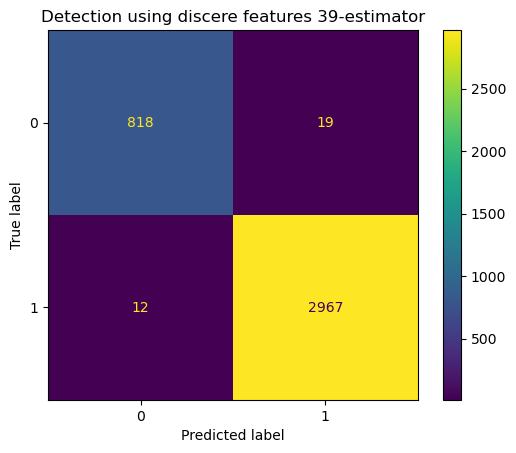

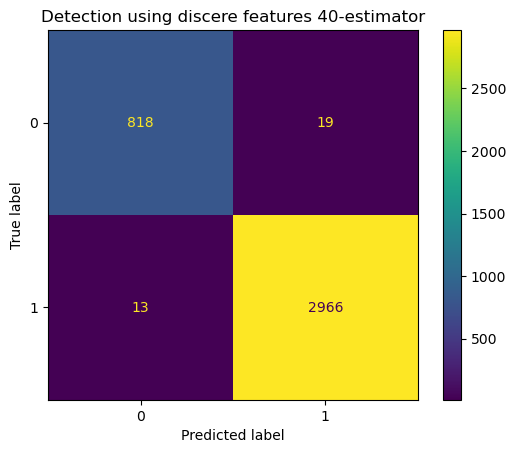

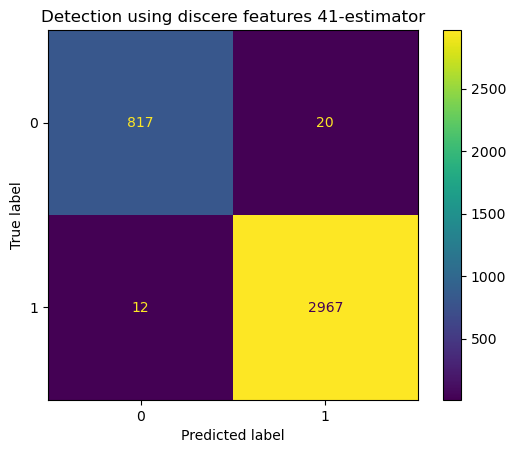

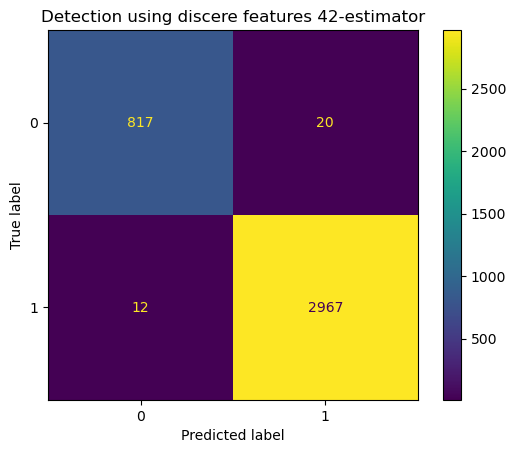

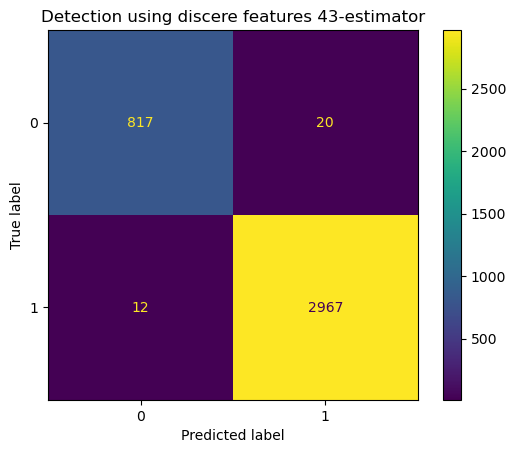

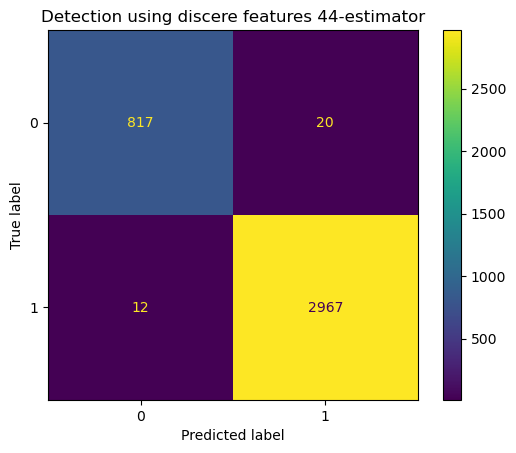

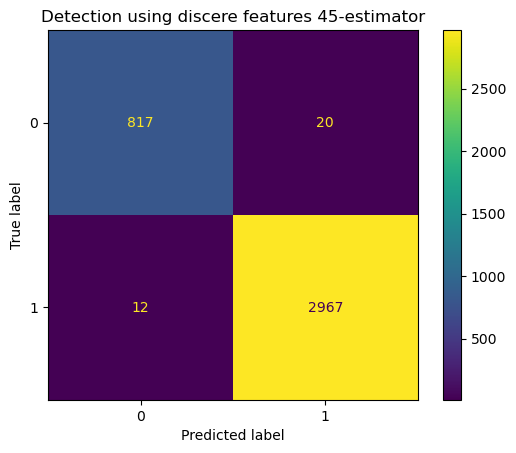

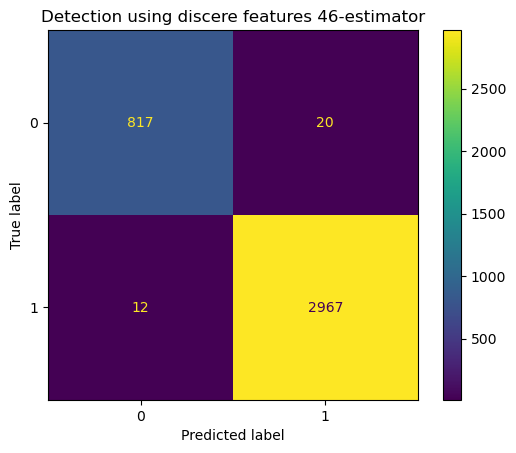

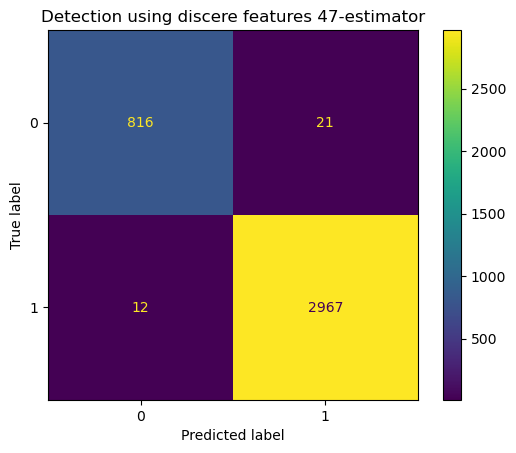

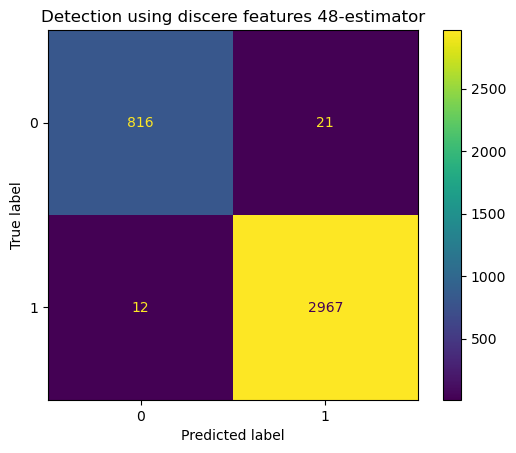

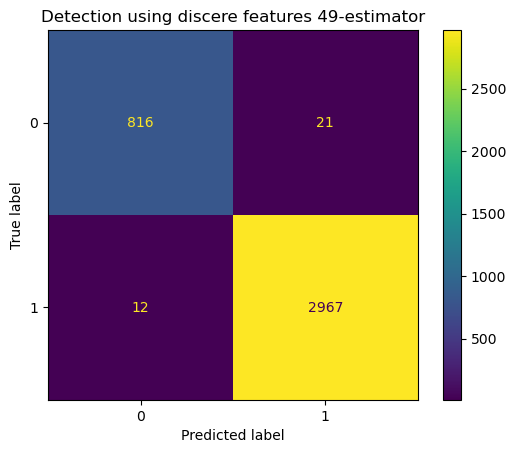

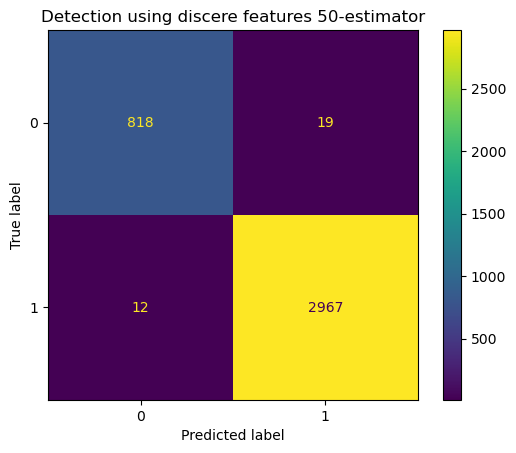

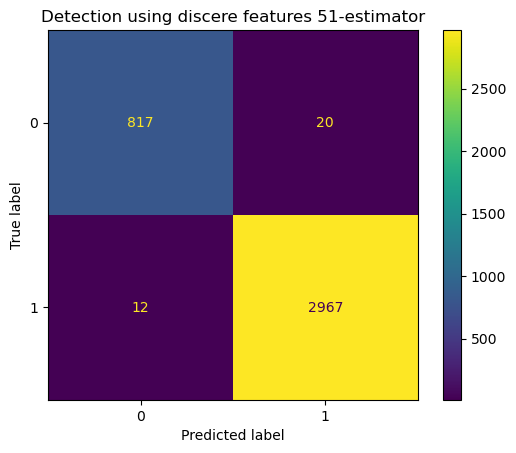

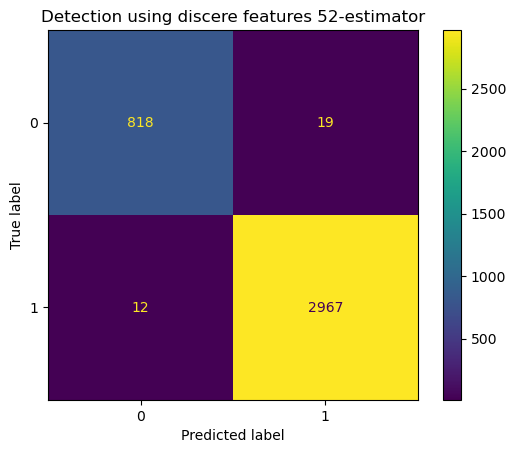

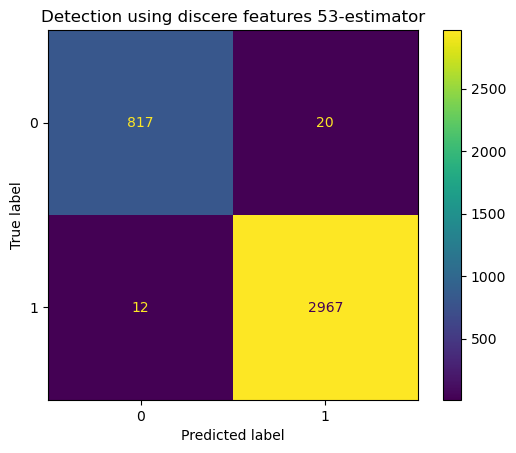

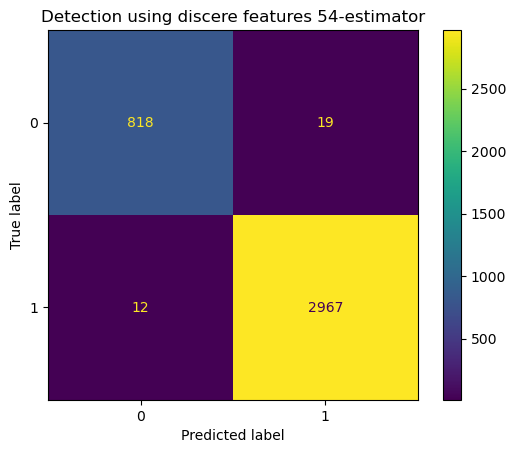

In [22]:
for i in range(54):
    cm=confusion_matrix(y_test,y_pred[i])
    cm_display=ConfusionMatrixDisplay(cm)
    print(f"\nClassification report {i+1}-estimator")
    print(classification_report(y_test, y_pred[i]))
    cm_display.plot()
    cm_display.ax_.set_title(f'Detection using discere features {i+1}-estimator')

### Nilai akurasi model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai akurasi yang terbaik

In [23]:
for i in range(54):
    print(f"Nilai Akurasi untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {acc(y_test,y_pred[i])*100:.5f}%")

Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 1-estimator 98.95178%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 2-estimator 98.92558%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 3-estimator 99.10901%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 4-estimator 99.16143%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 5-estimator 99.18763%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 6-estimator 99.16143%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 7-estimator 99.10901%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 8-estimator 99.13522%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 9-estimator 99.18763%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 10-estimator 99.13522%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 11-estimator 99.10901%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 12-estimator 99.10901%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 13-estimator 99.10901%
Nilai Akurasi untuk E

In [24]:
value_acc=[]
for i in range(54):
    value_acc.append(acc(y_test,y_pred[i]))
maks=max(value_acc)
lokasi=value_acc.index(maks)
print(f'Nilai terbesar untuk akurasi adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-acc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai akurasi non-baggingnya' )

Nilai terbesar untuk akurasi adalah 99.24004% dengan menggunakan Ensemble Bagging SVM 31-estimator yang 0.00000% lebih tinggi dari nilai akurasi non-baggingnya


### Nilai Spesifisitas model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai spesifisitas yang terbaik

In [25]:
for i in range(54):
    print(f"Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {spec(y_test,y_pred[i])*100:.5f}%",)

Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 1-estimator 97.13262%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 2-estimator 97.72999%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 3-estimator 97.37157%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 4-estimator 97.84946%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 5-estimator 97.49104%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 6-estimator 97.72999%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 7-estimator 97.37157%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 8-estimator 97.61051%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 9-estimator 97.49104%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 10-estimator 97.61051%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 11-estimator 97.49104%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 12-estimator 97.61051%
Nilai Spesifisitas untuk Ensemble Bag

In [26]:
value_ps=[]
for i in range(54):
    value_ps.append(spec(y_test,y_pred[i]))
maks=max(value_ps)
lokasi=value_ps.index(maks)
print(f'Nilai terbesar untuk spesifisitas adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-spec(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai spesifisitas non-baggingnya' )

Nilai terbesar untuk spesifisitas adalah 97.84946% dengan menggunakan Ensemble Bagging SVM 4-estimator yang 0.11947% lebih tinggi dari nilai spesifisitas non-baggingnya


### Nilai Recall model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai Recall yang terbaik

In [27]:
for i in range(54):
    print(f"Nilai Recall untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {rc(y_test,y_pred[i])*100:.5f}%",)

Nilai Recall untuk Ensemble Bagging SVM menggunakan 1-estimator 99.46291%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 2-estimator 99.26150%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 3-estimator 99.59718%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 4-estimator 99.53004%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 5-estimator 99.66432%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 6-estimator 99.56361%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 7-estimator 99.59718%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 8-estimator 99.56361%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 9-estimator 99.66432%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 10-estimator 99.56361%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 11-estimator 99.56361%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 12-estimator 99.53004%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 13-estimator 99.53004%
Nilai Recall untuk Ensemble Baggin

In [28]:
value_rc=[]
for i in range(54):
    value_rc.append(rc(y_test,y_pred[i]))
maks=max(value_rc)
lokasi=value_rc.index(maks)
print(f'Nilai terbesar untuk recall adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-rc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai recall non-baggingnya' )

Nilai terbesar untuk recall adalah 99.66432% dengan menggunakan Ensemble Bagging SVM 5-estimator yang 0.00000% lebih tinggi dari nilai recall non-baggingnya


### Nilai ROC-AUC model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai ROC-AUC yang terbaik

In [29]:
for i in range(54):
    print(f"Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {rocauc(y_test,y_pred[i])*100:.5f}%",)

Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 1-estimator 98.29776%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 2-estimator 98.49574%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 3-estimator 98.48437%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 4-estimator 98.68975%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 5-estimator 98.57768%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 6-estimator 98.64680%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 7-estimator 98.48437%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 8-estimator 98.58706%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 9-estimator 98.57768%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 10-estimator 98.58706%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 11-estimator 98.52733%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 12-estimator 98.57028%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 13-estimator 98.57028%
Nilai ROC-AUC untuk E

In [30]:
value_rocauc=[]
for i in range(54):
    value_rocauc.append(rocauc(y_test,y_pred[i]))
maks=max(value_rocauc)
lokasi=value_rocauc.index(maks)
print(f'Nilai terbesar untuk ROC-AUC adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-rocauc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai ROC-AUC non-baggingnya' )

Nilai terbesar untuk ROC-AUC adalah 98.70654% dengan menggunakan Ensemble Bagging SVM 24-estimator yang 0.00938% lebih tinggi dari nilai ROC-AUC non-baggingnya


### Mencari peningkatan performa

In [31]:
value_concat = []
t_value_concat = []
value_concat.append(value_acc)
value_concat.append(value_ps)
value_concat.append(value_rc)
value_concat.append(value_rocauc)
for i in range(54):
    temp = []
    for data in value_concat:
        temp.append(data[i])
    t_value_concat.append(temp)
print(t_value_concat)

[[0.989517819706499, 0.9713261648745519, 0.994629070157771, 0.9829776175161613], [0.9892557651991615, 0.977299880525687, 0.9926149714669352, 0.9849574259963111], [0.9910901467505241, 0.973715651135006, 0.9959718026183283, 0.9848437268766672], [0.9916142557651991, 0.978494623655914, 0.9953004363880497, 0.9868975300219819], [0.9918763102725366, 0.974910394265233, 0.9966431688486069, 0.98577678155692], [0.9916142557651991, 0.977299880525687, 0.995636119503189, 0.9864680000144379], [0.9910901467505241, 0.973715651135006, 0.9959718026183283, 0.9848437268766672], [0.9913522012578616, 0.97610513739546, 0.995636119503189, 0.9858706284493245], [0.9918763102725366, 0.974910394265233, 0.9966431688486069, 0.98577678155692], [0.9913522012578616, 0.97610513739546, 0.995636119503189, 0.9858706284493245], [0.9910901467505241, 0.974910394265233, 0.995636119503189, 0.9852732568842109], [0.9910901467505241, 0.97610513739546, 0.9953004363880497, 0.9857027868917548], [0.9910901467505241, 0.97610513739546, 

In [32]:
value_svm = [acc(y_test,y_pred_svm),spec(y_test,y_pred_svm),rc(y_test,y_pred_svm),rocauc(y_test,y_pred_svm)]
for data in t_value_concat:
    for i in range(4):
        data[i]-=value_svm[i]
for i in range(54):
    print(f'Untuk {i+1}-estimator menghasilkan peningkatan performa {t_value_concat[i][0]} akurasi, {t_value_concat[i][1]} spesifisitas, {t_value_concat[i][2]} sensitivitas, dan {t_value_concat[i][3]} ROC-AUC')

Untuk 1-estimator menghasilkan peningkatan performa -0.002882599580712797 akurasi, -0.005973715651135025 spesifisitas, -0.002014098690835908 sensitivitas, dan -0.003993907170985578 ROC-AUC
Untuk 2-estimator menghasilkan peningkatan performa -0.0031446540880503138 akurasi, 0.0 spesifisitas, -0.004028197381671705 sensitivitas, dan -0.002014098690835797 ROC-AUC
Untuk 3-estimator menghasilkan peningkatan performa -0.0013102725366876955 akurasi, -0.0035842293906809264 spesifisitas, -0.0006713662302786361 sensitivitas, dan -0.00212779781047967 ROC-AUC
Untuk 4-estimator menghasilkan peningkatan performa -0.0007861635220126617 akurasi, 0.0011947431302270495 spesifisitas, -0.0013427324605572721 sensitivitas, dan -7.39946651650003e-05 ROC-AUC
Untuk 5-estimator menghasilkan peningkatan performa -0.0005241090146751448 akurasi, -0.002389486260453988 spesifisitas, 0.0 sensitivitas, dan -0.0011947431302269385 ROC-AUC
Untuk 6-estimator menghasilkan peningkatan performa -0.0007861635220126617 akurasi, 

In [33]:
def cekdilist(list,nol):
    for i in list:
        if i<0:
            return False
    return True

bestloc = []
for i in range(54):
    if cekdilist(t_value_concat[i],0)==True:
        print(f'Untuk {i+1}-estimator menghasilkan peningkatan performa yang definit positif yaitu {t_value_concat[i][0]*100:.5f}% akurasi, {t_value_concat[i][1]*100:.5f}% spesifisitas, {t_value_concat[i][2]*100:.5f}% sensitivitas, dan {t_value_concat[i][3]*100:.5f}% ROC-AUC dengan totalnya {t_value_concat[i][0]*100+t_value_concat[i][1]*100+t_value_concat[i][2]*100+t_value_concat[i][3]*100:.5f}%')
        bestloc.append(i)

Untuk 31-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.00000% akurasi, 0.00000% spesifisitas, 0.00000% sensitivitas, dan 0.00000% ROC-AUC dengan totalnya 0.00000%


### Menyimpan model

In [34]:
import joblib

for i in range(54):
    joblib.dump(clf[i], f'Ensemble Bagging SVM menggunakan {i+1}-estimator.pkl')

### Menyimpan splitted data dan y_prediksi

In [35]:
y_pred

[array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dt

In [36]:
df_ypred = pd.DataFrame(y_pred)
df_ypred = df_ypred.transpose()
df_ypred

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3814,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [37]:
df_ypredsvm = pd.DataFrame(y_pred_svm)
df_ypredsvm

,0
0,1
1,1
2,0
3,1
4,1
...,...
3811,1
3812,0
3813,0
3814,1


In [38]:
kolompred = [f'{n}-estimator' for n in range(54)]
kolompred.append('ypredsvm')
print(kolompred)

['0-estimator', '1-estimator', '2-estimator', '3-estimator', '4-estimator', '5-estimator', '6-estimator', '7-estimator', '8-estimator', '9-estimator', '10-estimator', '11-estimator', '12-estimator', '13-estimator', '14-estimator', '15-estimator', '16-estimator', '17-estimator', '18-estimator', '19-estimator', '20-estimator', '21-estimator', '22-estimator', '23-estimator', '24-estimator', '25-estimator', '26-estimator', '27-estimator', '28-estimator', '29-estimator', '30-estimator', '31-estimator', '32-estimator', '33-estimator', '34-estimator', '35-estimator', '36-estimator', '37-estimator', '38-estimator', '39-estimator', '40-estimator', '41-estimator', '42-estimator', '43-estimator', '44-estimator', '45-estimator', '46-estimator', '47-estimator', '48-estimator', '49-estimator', '50-estimator', '51-estimator', '52-estimator', '53-estimator', 'ypredsvm']


In [39]:
df_ypredicted = pd.concat([df_ypred,df_ypredsvm],axis=1)
df_ypredicted.columns=kolompred
df_ypredicted.to_csv('df_ypredicted.csv', index=False)

In [40]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.to_csv('df_xtrain.csv', index=False)
df_xtest = pd.DataFrame(x_test)
df_xtest.to_csv('df_xtest.csv', index=False)
df_ytrain = pd.DataFrame(y_train)
df_ytrain.to_csv('df_ytrain.csv', index=False)
df_ytest = pd.DataFrame(y_test)
df_ytest.to_csv('df_ytest.csv', index=False)

# Generate kalimat skripsi

In [41]:
print('Pada eksperimen hanya menggunakan model SVM, model tersebut memberikan hasil klasifikasi yang cukup baik dengan akurasi {:.2f}%, sensitivitas {:.2f}%, spesifisitas {:.2f}%, dan nilai ROC-AUC {:.2f}%. Berikut adalah confusion matriks dari model tersebut.'.format(acc(y_test,y_pred_svm)*100,rc(y_test,y_pred_svm)*100,spec(y_test,y_pred_svm)*100,rocauc(y_test,y_pred_svm)*100))

Pada eksperimen hanya menggunakan model SVM, model tersebut memberikan hasil klasifikasi yang cukup baik dengan akurasi 99.24%, sensitivitas 99.66%, spesifisitas 97.73%, dan nilai ROC-AUC 98.70%. Berikut adalah confusion matriks dari model tersebut.


In [42]:
best=[11,22,35,37]
for i in best:
    print("Pada eksperimen menggunakan model Ensemble bagging SVM {}-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi {:.2f}%, sensitivitas {:.2f}%, spesifisitas {:.2f}%, dan nilai ROC-AUC {:.2f}% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.".format(i+1,acc(y_test,y_pred[i])*100,rc(y_test,y_pred[i])*100,spec(y_test,y_pred[i])*100,rocauc(y_test,y_pred[i])*100))

Pada eksperimen menggunakan model Ensemble bagging SVM 12-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 99.11%, sensitivitas 99.53%, spesifisitas 97.61%, dan nilai ROC-AUC 98.57% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.
Pada eksperimen menggunakan model Ensemble bagging SVM 23-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 99.19%, sensitivitas 99.60%, spesifisitas 97.73%, dan nilai ROC-AUC 98.66% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.
Pada eksperimen menggunakan model Ensemble bagging SVM 36-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 99.16%, se